# CrossFit Athletes Performance Analysis & Prediction

## Objective
This project aims to analyze and model the performance of CrossFit athletes using data collected from competitions and training profiles worldwide.  
The dataset includes **demographics** (age, gender, height, weight), **performance metrics** (deadlift, snatch, Fran time, pullups, etc.), and **training/lifestyle habits** (nutrition, schedule, experience).

The main goals are:
1. **Exploratory Analysis**  
   - Understand the characteristics of CrossFit athletes (age, gender, body size, training background).  
   - Identify trends and patterns in performance across different demographics and experience levels.  

2. **Predictive Modeling**  
   - Build regression models to predict key performance outcomes (e.g., deadlift max, Fran time) from athlete demographics and training habits.  
   - Evaluate and compare models (baseline, linear, regularized, tree-based).  
   - Determine the most important features driving performance.  

3. **Practical Insights**  
   - Highlight which factors are most strongly associated with higher performance.  
   - Provide evidence-based insights that athletes and coaches can use to optimize training approaches.  

---


# Data Inspection

In [1]:
# Importing pandas library for loading the dataset
import pandas as pd

# Loading the dataset
df = pd.read_csv('../data/athletes.csv')
df.head()                

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


## CrossFit Dataset Glossary

This dataset combines **demographics**, **strength lifts**, and **benchmark workouts (WODs)**.  
Here’s what each performance related column means:

### Strength Lifts
- **snatch** → Olympic lift where the barbell moves from ground to overhead in one motion. (Score: max weight lifted, lbs)  
- **candj** → Clean & Jerk, Olympic lift (ground → shoulders → overhead). (Score: max weight lifted, lbs)  
- **deadlift** → Classic powerlift, barbell lifted from ground to hips. (Score: max weight lifted, lbs)  
- **backsq** → Back Squat, barbell squat with weight on the back. (Score: max weight lifted, lbs)  
- **pullups** → Max strict pull-ups performed without assistance. (Score: count of reps)

### Benchmark WODs (Workouts of the Day)
- **Fran** → 21-15-9 reps of thrusters (squat + press) and pull-ups. (Score: completion time, lower is better)  
- **Helen** → 3 rounds of 400m run, 21 kettlebell swings, 12 pull-ups. (Score: completion time)  
- **Grace** → 30 clean & jerks (135 lb / 95 lb). (Score: completion time)  
- **Filthy50 (filthy50)** → 50 reps each of 10 movements. (Score: completion time)  
- **Fight Gone Bad (fgonebad)** → 3 rounds, 5 stations (wall balls, deadlift high pull, box jump, push press, rowing). (Score: total reps + calories, higher is better)  
- **Run400** → 400m sprint time.  
- **Run5k (run5k)** → 5k run time.  

### Demographics & Training Background
- **athlete_id, name** → Identifiers.  
- **region, team, affiliate** → Competition info / gym affiliation.  
- **gender, age, height, weight** → Demographics and body size.  
- **eat, train, background, experience, schedule, howlong** → Lifestyle, training style, athletic background, years of experience.

---

### Summary
- **Lifts** = strength/power capacity.  
- **WODs & runs** = conditioning/endurance performance.  
- **Habits/demographics** = potential predictors of performance.


In [2]:
# Shape of the dataset, rows & columns

print("Dataset shape (rows, columns):", df.shape)

Dataset shape (rows, columns): (423006, 27)


In [3]:
# Column names

print("\nColumn names:")
print(df.columns.tolist())


Column names:
['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age', 'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'eat', 'train', 'background', 'experience', 'schedule', 'howlong']


In [4]:
# Dataset information

print("\nDataFrame info:")
print(df.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  423003 non-null  float64
 1   name        331110 non-null  object 
 2   region      251262 non-null  object 
 3   team        155160 non-null  object 
 4   affiliate   241916 non-null  object 
 5   gender      331110 non-null  object 
 6   age         331110 non-null  float64
 7   height      159869 non-null  float64
 8   weight      229890 non-null  float64
 9   fran        55426 non-null   float64
 10  helen       30279 non-null   float64
 11  grace       40745 non-null   float64
 12  filthy50    19359 non-null   float64
 13  fgonebad    29738 non-null   float64
 14  run400      22246 non-null   float64
 15  run5k       36097 non-null   float64
 16  candj       104435 non-null  float64
 17  snatch      97280 non-null   float64
 18  deadlift    115323 non-null

## Data Inspection Results

- **Shape:** The dataset has **423,006 rows** (athletes) and **27 columns** (attributes).  
- **Column types:**  
  - 16 numeric columns (e.g., `age`, `height`, `weight`, `deadlift`, `snatch`, `backsq`, workout times).  
  - 11 text/categorical columns (e.g., `name`, `region`, `gender`, `eat`, `train`, `background`).  

- **Missing values:**  
  - Demographics:  
    - `age` present for ~78% of rows.  
    - `height` missing in ~62% of rows.  
    - `weight` missing in ~46% of rows.  
    - `gender` missing in ~22% of rows.  
  - Performance:  
    - `deadlift` (115k entries, ~27%).  
    - `backsq` (110k entries, ~26%).  
    - `snatch` (97k entries, ~23%).  
    - `fran` (55k entries, ~13%).  
    - Other workouts (`Helen`, `Grace`, etc.) have <10% coverage.  
  - Training habits (e.g., `eat`, `train`, `schedule`): ~22–25% filled.  

- **Findings:**  
  - Not all athletes recorded full information.  
  - Strength metrics (`deadlift`, `backsq`, `snatch`) have the most usable data.  
  - Time-based WODs have much smaller sample sizes.  
  - For modeling, **deadlift/back squat** are the best first target candidates.


# Data Consistency Check

In [5]:
# columns check to see how many values are filled vs missing
# The minimum and maximum values and a few sample values to confirms if all the entered values are realistic
key_cols = ['age', 'height', 'weight', 
            'deadlift', 'backsq', 'snatch', 'candj', 'pullups', 
            'fran', 'helen', 'grace', 'filthy50', 'run400', 'run5k']

# empty list to store results
summary = []

# Looping through each column and collect stats
for col in key_cols:
    if col in df.columns:
        summary.append({
            "column": col,
            "non_missing": df[col].notna().sum(),
            "missing": df[col].isna().sum(),
            "min": df[col].min(),
            "max": df[col].max(),
            "sample_values": df[col].dropna().unique()[:5]
        })

# Turning the results into a DataFrame
range_check = pd.DataFrame(summary)

# Displaying the table 
range_check


,column,non_missing,missing,min,max,sample_values
0,age,331110,91896,13.0,1.250000e+02,"[24.0, 42.0, 40.0, 32.0, 37.0]"
1,height,159869,263137,0.0,8.388607e+06,"[70.0, 67.0, 65.0, 73.0, 72.0]"
2,weight,229890,193116,1.0,2.017500e+04,"[166.0, 190.0, 149.0, 230.0, 175.0]"
3,deadlift,115323,307683,-500.0,8.388607e+06,"[400.0, 375.0, 435.0, 0.0, 365.0]"
4,backsq,110517,312489,-7.0,8.388607e+06,"[305.0, 325.0, 414.0, 0.0, 365.0]"
5,snatch,97280,325726,0.0,8.388607e+06,"[200.0, 150.0, 0.0, 185.0, 225.0]"
6,candj,104435,318571,-45.0,8.388607e+06,"[220.0, 245.0, 205.0, 265.0, 0.0]"
7,pullups,50608,372398,-6.0,2.147484e+09,"[25.0, 50.0, 0.0, 81.0, 55.0]"
8,fran,55426,367580,1.0,8.388607e+06,"[211.0, 206.0, 205.0, 119.0, 304.0]"
9,helen,30279,392727,1.0,8.388607e+06,"[645.0, 465.0, 614.0, 417.0, 485.0]"


## Consistency Check Results

- **Demographics**
  - `age`: Values range 13–125. The upper end (125) is unrealistic → needs capping (likely 14–80).
  - `height`: Contains zeros and extremely large values (up to 8.3M). Normal human range is ~55–83 inches → cleaning required.
  - `weight`: Goes from 1 to 20,175 lbs, which is impossible. Typical range is ~90–400 lbs.

- **Strength Lifts**
  - `deadlift`, `backsq`, `snatch`, `candj`: Many impossible values (negatives, zeros, or millions). 
    - Plausible ranges: 
      - Deadlift: 100–1,200 lbs 
      - Back Squat: 100–1,000 lbs 
      - Snatch: 75–400 lbs 
      - Clean & Jerk: 100–500 lbs
  - `pullups`: Negative values and a maximum in the billions. Realistic range: 0–100.

- **WOD Times**
  - `fran`, `helen`, `grace`, `filthy50`, `run400`, `run5k`: Contain corrupted values (up to 8.3M). 
  - Typical ranges:  
    - Fran: 2–15 min  
    - Helen: 7–20 min  
    - Grace: 1–10 min  
    - Filthy50: 15–45 min  
    - Run400: 50–120 sec  
    - Run5k: 12–40 min  

### Findings
The dataset contains **a large number of unrealistic values** (negatives, zeros, and huge numbers).  
Before modeling, we'll define **cleaning rules** to cap values within humanly plausible ranges and handle bad entries appropriately.


# Data Cleaning

## Data Cleaning Rules

From the consistency check, we saw that the dataset contains a large number of unrealistic values (e.g., age = 125, height in millions, negative lifts, billions of pull-ups).  
Before moving to EDA and modeling, we'll define clear rules for what counts as *valid data*.

### Cleaning Plan

**1. Demographics**
- Age → keep 14–80 years, set values outside this range to NaN.  
- Height → keep 55–83 inches (≈ 4’7”–7’0”), set outside range to NaN.  
- Weight → keep 90–400 lbs, set outside range to NaN.  

**2. Strength Lifts**
- Deadlift → keep 100–1,200 lbs.  
- Back Squat → keep 100–1,000 lbs.  
- Snatch → keep 75–400 lbs.  
- Clean & Jerk → keep 100–500 lbs.  
- Pullups → keep 0–100 reps.  

**3. WOD Times (in seconds)**
- Fran → 120–900 sec (2–15 min).  
- Helen → 420–1,200 sec (7–20 min).  
- Grace → 60–600 sec (1–10 min).  
- Filthy50 → 900–2,700 sec (15–45 min).  
- Run400 → 50–120 sec.  
- Run5k → 720–2,400 sec (12–40 min).  

**4. Missing Values**
- Demographics: may impute with median or drop later.  
- Performance: leave as NaN for now.  
- Lifestyle text fields: process separately (split, encode).  

---


We apply these rules to remove corrupted values and replace them with NaN.  
This ensures that all numeric fields fall within humanly realistic ranges, making the dataset ready for EDA and modeling.


In [6]:
# Data Cleaning

import numpy as np

# Definining realistic ranges for numeric columns
cleaning_rules = {
    # Demographics
    "age": (14, 80),
    "height": (55, 83),     # inches
    "weight": (90, 400),    # lbs

    # Strength lifts
    "deadlift": (100, 1200),
    "backsq": (100, 1000),
    "snatch": (75, 400),
    "candj": (100, 500),
    "pullups": (0, 100),

    # WOD times (seconds)
    "fran": (120, 900),
    "helen": (420, 1200),
    "grace": (60, 600),
    "filthy50": (900, 2700),
    "run400": (50, 120),
    "run5k": (720, 2400)
}

# Function to clean columns
def apply_cleaning_rules(df, rules):
    df_clean = df.copy()
    for col, (low, high) in rules.items():
        if col in df_clean.columns:
            # Replacing values outside the valid range with NaN
            df_clean.loc[(df_clean[col] < low) | (df_clean[col] > high), col] = np.nan
    return df_clean

# Applying cleaning rules
df_clean = apply_cleaning_rules(df, cleaning_rules)

# Quick check: before vs after cleaning for a few columns
for col in ["age", "height", "weight", "deadlift", "fran"]:
    if col in df.columns:
        print(f"\n--- {col.upper()} ---")
        print("Before cleaning → Min:", df[col].min(), " Max:", df[col].max())
        print("After cleaning  → Min:", df_clean[col].min(), " Max:", df_clean[col].max())



--- AGE ---
Before cleaning → Min: 13.0  Max: 125.0
After cleaning  → Min: 14.0  Max: 62.0

--- HEIGHT ---
Before cleaning → Min: 0.0  Max: 8388607.0
After cleaning  → Min: 55.0  Max: 83.0

--- WEIGHT ---
Before cleaning → Min: 1.0  Max: 20175.0
After cleaning  → Min: 90.0  Max: 400.0

--- DEADLIFT ---
Before cleaning → Min: -500.0  Max: 8388607.0
After cleaning  → Min: 100.0  Max: 1168.0

--- FRAN ---
Before cleaning → Min: 1.0  Max: 8388607.0
After cleaning  → Min: 120.0  Max: 900.0


## After Cleaning

The cleaning rules successfully removed unrealistic values and replaced them with NaN.  
Key changes observed:  

- **Age** → now restricted to 14–80 years (max observed = 62).  
- **Height** → now restricted to 55–83 inches.  
- **Weight** → now restricted to 90–400 lbs.  
- **Deadlift** → now between 100–1,168 lbs.  
- **Fran (benchmark WOD)** → now between 120–900 seconds.  

This confirms our rules are working as expected.  
The dataset is now more realistic and ready for **Next step: Handling missing values then Exploratory Data Analysis**.


# Handling missing values

In [7]:
from sklearn.impute import SimpleImputer

# Copy cleaned dataset
df_ready = df_clean.copy()

# Demographics (Age, Height, Weight), fill with median
demographic_cols = ["age", "height", "weight"]
median_imputer = SimpleImputer(strategy="median")

df_ready[demographic_cols] = median_imputer.fit_transform(df_ready[demographic_cols])

# Text Columns, replace NaN with "Unknown"
text_cols = ["eat", "train", "background", "experience", "schedule", "howlong"]

for col in text_cols:
    if col in df_ready.columns:
        df_ready[col] = df_ready[col].fillna("Unknown")

# Team/Region/Affiliate, fill NaN with "None"
cat_cols = ["region", "team", "affiliate"]

for col in cat_cols:
    if col in df_ready.columns:
        df_ready[col] = df_ready[col].fillna("None")

# Leaving Strength Lifts & WODs as NaN (we'll work with them later in EDA/modeling)

# Quick Check
print("Missing values after cleaning:")
print(df_ready.isna().sum())


Missing values after cleaning:
athlete_id         3
name           91896
region             0
team               0
affiliate          0
gender         91896
age                0
height             0
weight             0
fran          368044
helen         393407
grace         382814
filthy50      404208
fgonebad      393268
run400        402075
run5k         387550
candj         326603
snatch        332936
deadlift      311750
backsq        316806
pullups       372536
eat                0
train              0
background         0
experience         0
schedule           0
howlong            0
dtype: int64


In [8]:
# Replacing infinities with NaN in numeric columns
num_cols = df_ready.select_dtypes(include=[np.number]).columns

df_ready[num_cols] = df_ready[num_cols].replace([np.inf, -np.inf], np.nan)

print("Infinities left after cleaning:", np.isinf(df_ready[num_cols].values).sum())


Infinities left after cleaning: 0


## Results
- **Demographics (age, height, weight)** → imputed with median, no missing values left.  
- **Text fields (eat, train, background, experience, schedule, howlong)** → filled with `"Unknown"`.  
- **Categorical fields (region, team, affiliate)** → filled with `"None"`.  
- **Performance metrics (deadlift, WOD times, lifts)** → still contain NaNs, which is expected since not all athletes log these values. We will handle them selectively during analysis and modeling.

### Current Missingness
- Athlete demographics: **0 missing**  
- Lifestyle text fields: **0 missing**  
- Categorical identifiers: **0 missing**  
- Performance metrics: still **high missingness (300k–400k rows missing per WOD)**  

This means our dataset is now **clean and consistent** in structure, while still preserving the reality that many athletes don’t record all workouts.


# Exploratory Data Analysis

## Distribution of demographics

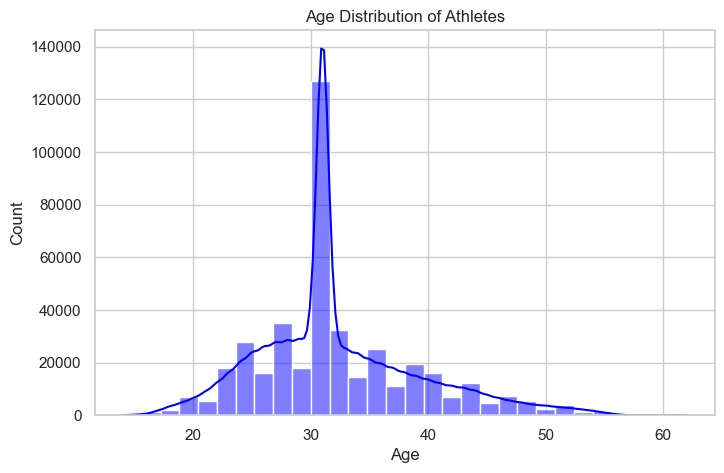

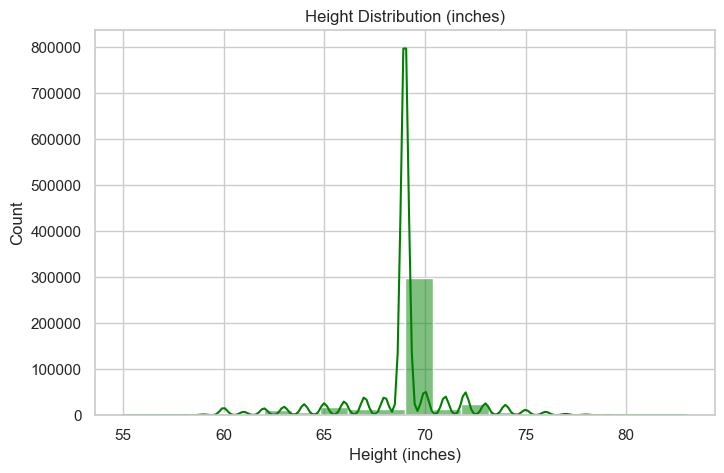

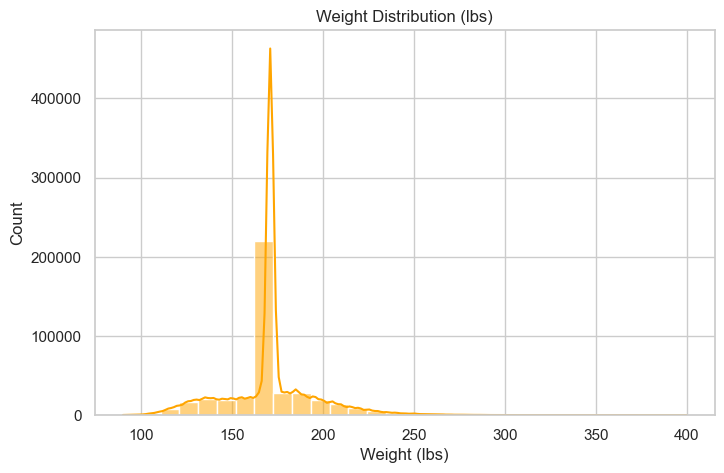

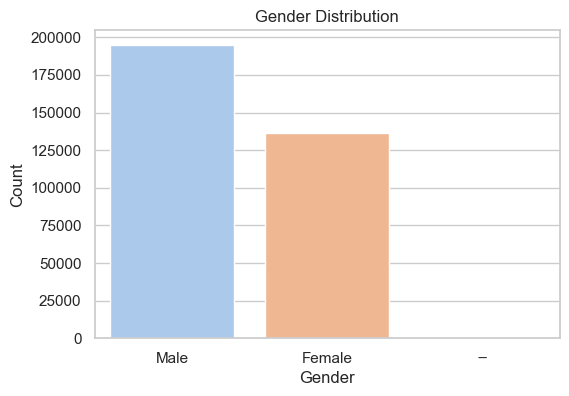

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# style
sns.set(style="whitegrid")

# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_ready["age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Athletes")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Height Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_ready["height"], bins=20, kde=True, color="green")
plt.title("Height Distribution (inches)")
plt.xlabel("Height (inches)")
plt.ylabel("Count")
plt.show()

# Weight Distribution
plt.figure(figsize=(8,5))
sns.histplot(df_ready["weight"], bins=30, kde=True, color="orange")
plt.title("Weight Distribution (lbs)")
plt.xlabel("Weight (lbs)")
plt.ylabel("Count")
plt.show()

# Gender Breakdown
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df_ready, palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


### Age
- Most athletes are clustered between **25–35 years old**.  
- There is a sharp spike around **30 years**, suggesting many records round to this age.  
- Very few athletes above 50 are represented.  

### Height
- Heights cluster tightly around **67–72 inches (5’7”–6’0”)**.  
- Distribution is narrow, consistent with adult athlete populations.  

### Weight
- Weights peak between **150–190 lbs**, with most athletes falling between **140–220 lbs**.  
 
### Gender
- Dataset includes both male and female athletes.  
- Roughly **60% male vs 40% female** representation.  
- A few entries have missing/undefined gender.  

---


## Distribution of Strength lifts

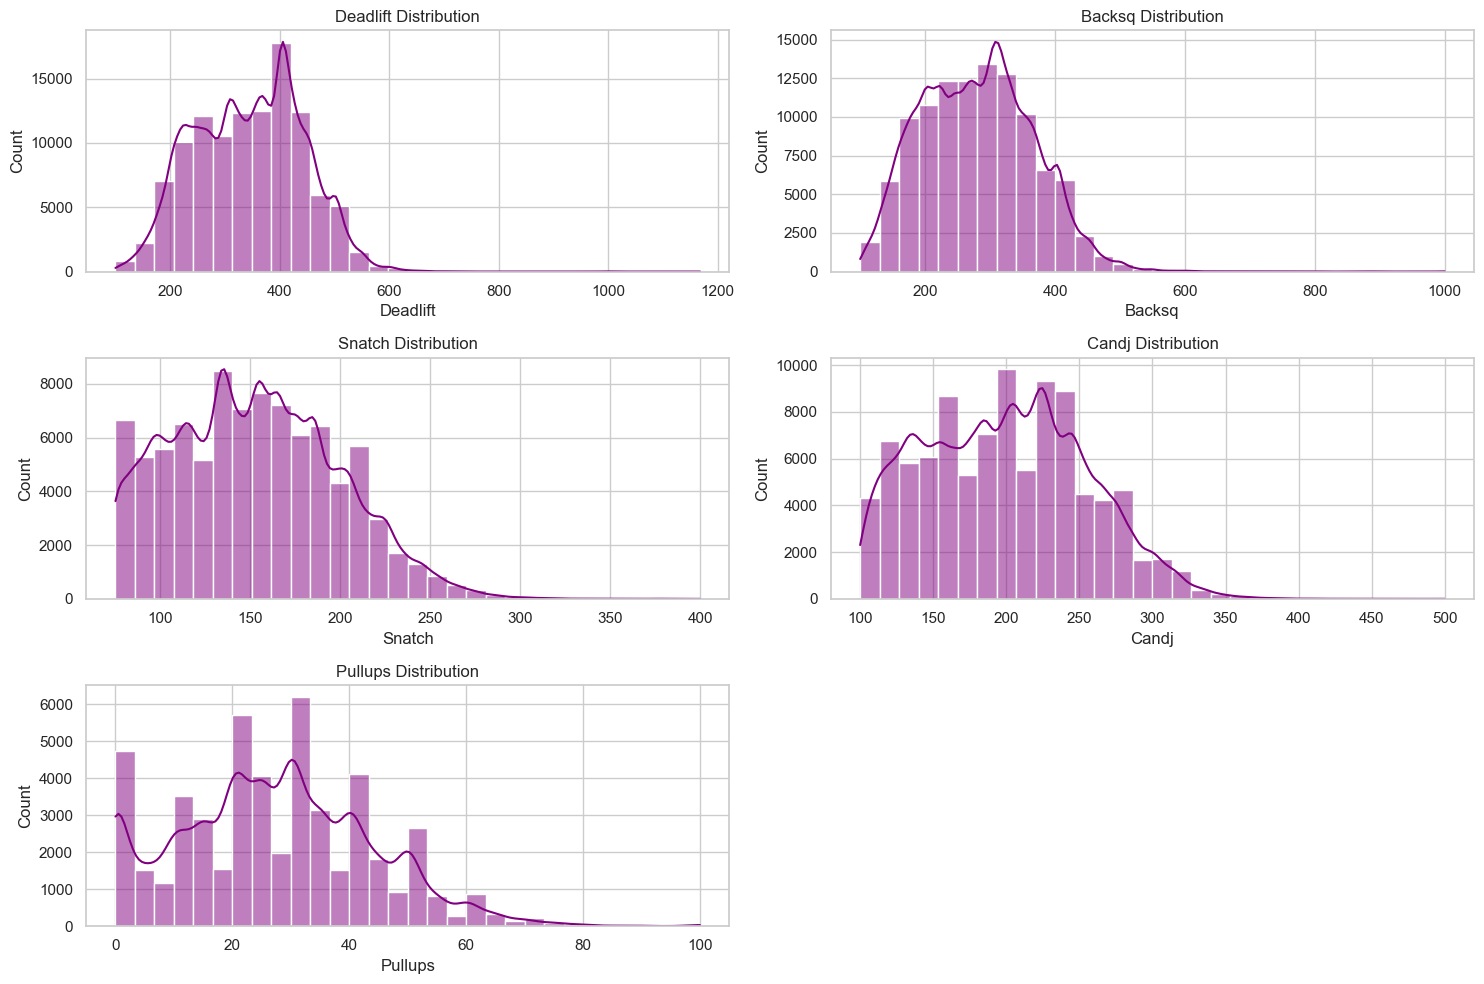

            deadlift         backsq        snatch         candj       pullups
count  111256.000000  106200.000000  90070.000000  96403.000000  50470.000000
mean      344.411232     280.332844    152.404685    198.920978     27.300614
std        98.903625      86.185090     45.795870     55.348725     16.554311
min       100.000000     100.000000     75.000000    100.000000      0.000000
25%       265.000000     210.000000    115.000000    155.000000     15.000000
50%       350.000000     278.000000    154.000000    200.000000     27.000000
75%       415.000000     340.000000    185.000000    240.000000     39.000000
max      1168.000000    1000.000000    400.000000    500.000000    100.000000


In [10]:
strength_cols = ["deadlift", "backsq", "snatch", "candj", "pullups"]

# Plot distributions
plt.figure(figsize=(15,10))

for i, col in enumerate(strength_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_ready[col], bins=30, kde=True, color="purple")
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

# summary stats
print(df_ready[strength_cols].describe())


### Deadlift
- Range: **100–1168 lbs**  
- Mean ≈ **344 lbs**, Median ≈ **350 lbs**  
- Most athletes cluster between **265–415 lbs**  
- Distribution shows a strong central peak with a long tail of elite lifters.  

### Back Squat
- Range: **100–1000 lbs**  
- Mean ≈ **280 lbs**, Median ≈ **278 lbs**  
- Most fall between **210–340 lbs**  
- Distribution shape is similar to deadlift but slightly lighter overall.  

### Snatch
- Range: **75–400 lbs**  
- Mean ≈ **152 lbs**, Median ≈ **154 lbs**  
- 50% of athletes fall between **115–185 lbs**  
- As expected, the snatch has much lower weights compared to squat/deadlift.  

### Clean & Jerk
- Range: **100–500 lbs**  
- Mean ≈ **199 lbs**, Median ≈ **200 lbs**  
- 50% of athletes fall between **155–240 lbs**  
- Distribution shows a fairly even spread with a smooth peak.  

### Pull-ups
- Range: **0–100 reps**  
- Mean ≈ **27 reps**, Median ≈ **27 reps**  
- 50% of athletes complete between **15–39 reps**  
- Some clustering at round numbers (e.g., 20, 30) suggests self-reported estimates.  

---

- Deadlifts and back squats are the heaviest lifts, clustered in the 250–400 lb range.  
- Olympic lifts (Snatch and C&J) are lighter but follow consistent patterns.  
- Pull-ups vary widely, with many athletes reporting around 20–30 reps.  



## Strength Lift Correlations

Strength Lift Correlation Matrix:

          deadlift    backsq    snatch     candj   pullups
deadlift  1.000000  0.904472  0.840886  0.874475  0.492952
backsq    0.904472  1.000000  0.865548  0.892141  0.477520
snatch    0.840886  0.865548  1.000000  0.946882  0.535002
candj     0.874475  0.892141  0.946882  1.000000  0.531807
pullups   0.492952  0.477520  0.535002  0.531807  1.000000


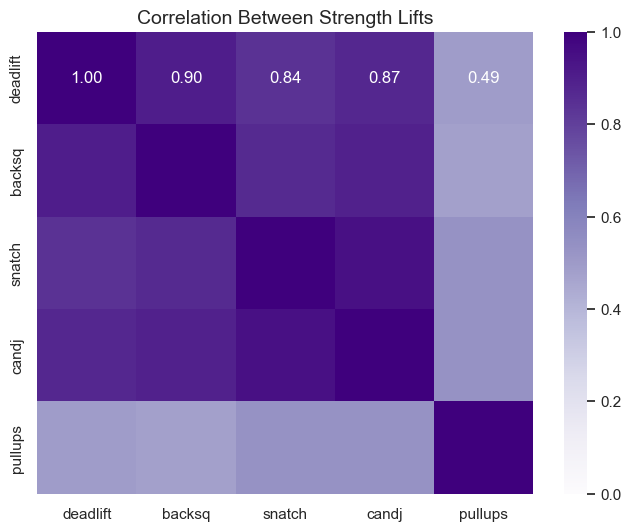

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# strength-related columns
strength_cols = ["deadlift", "backsq", "snatch", "candj", "pullups"]

# Computing correlation matrix
corr_matrix = df_ready[strength_cols].corr()

print("Strength Lift Correlation Matrix:\n")
print(corr_matrix)

# heatmap plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Purples", vmin=0, vmax=1)
plt.title("Correlation Between Strength Lifts", fontsize=14)
plt.show()


The correlation heatmap shows some clear patterns:

- Deadlift and back squat have a very strong relationship (above 0.9). This means athletes who are strong in squats are usually strong in deadlifts too. Because of this, these two lifts might be giving almost the same information in a model.

- Snatch and clean & jerk are also very closely related (about 0.95). Both are Olympic lifts and test similar explosive strength and technique. For analysis or prediction, one of them could be enough.

- Deadlift/back squat vs Olympic lifts also show high positive correlations (0.84–0.89). This suggests that a strong base in squats and deadlifts helps athletes perform well in Olympic lifts.

- Pull-ups are different. Their correlation with other lifts is much lower (0.47–0.53). This makes sense since pull-ups depend more on bodyweight and relative strength rather than just raw lifting power.

----
Most lifts are strongly related to each other, so we may need to be careful about using all of them together. Some may be redundant, but pull-ups stand out as a useful different type of strength measure

## WOD Performance EDA

Missingness in WOD performance:
fran        368044
grace       382814
helen       393407
filthy50    404208
run400      402075
run5k       387550
dtype: int64


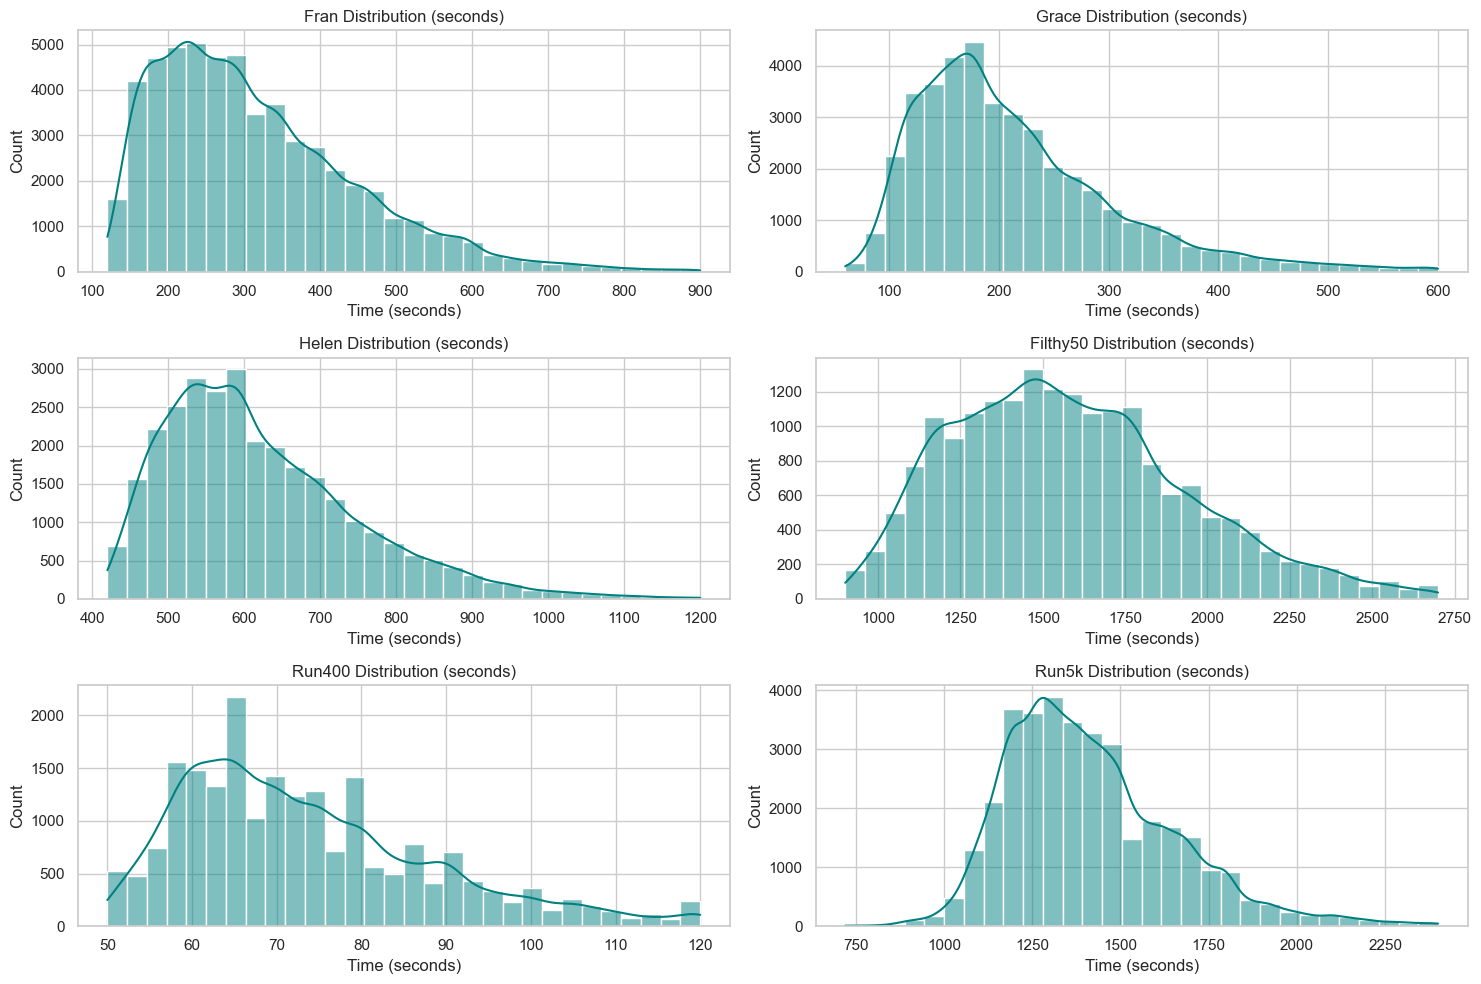


Summary stats for WODs:
               fran         grace        helen      filthy50        run400  \
count  54962.000000  40192.000000  29599.00000  18798.000000  20931.000000   
mean     316.015465    213.623383    622.44640   1583.736940     73.508098   
std      132.683624     91.721892    128.88301    354.867707     14.935209   
min      120.000000     60.000000    420.00000    900.000000     50.000000   
25%      215.000000    148.000000    528.00000   1313.000000     62.000000   
50%      289.000000    192.000000    596.00000   1546.000000     70.000000   
75%      390.000000    258.000000    693.00000   1800.000000     82.000000   
max      900.000000    600.000000   1200.00000   2700.000000    120.000000   

              run5k  
count  35456.000000  
mean    1415.134956  
std      241.319504  
min      720.000000  
25%     1245.000000  
50%     1380.000000  
75%     1555.000000  
max     2400.000000  


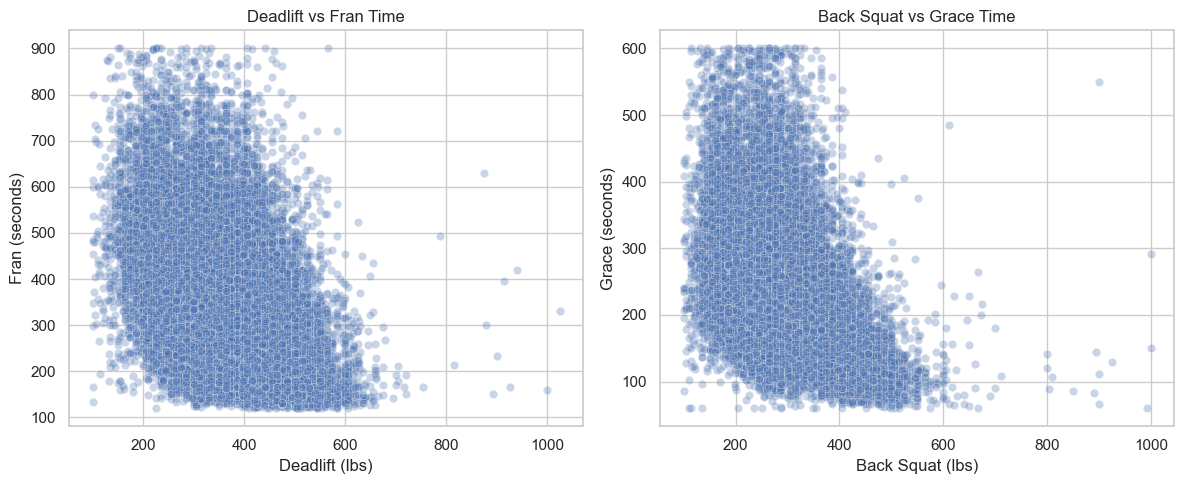

In [12]:
# WOD Performance Analysis
wod_cols = ["fran", "grace", "helen", "filthy50", "run400", "run5k"]

# Missingness check
print("Missingness in WOD performance:")
print(df_ready[wod_cols].isna().sum())

# Distributions for all WODs
plt.figure(figsize=(15,10))
for i, col in enumerate(wod_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_ready[col], bins=30, kde=True, color="teal")
    plt.title(f"{col.capitalize()} Distribution (seconds)")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary stats for WODs:")
print(df_ready[wod_cols].describe())

# Strength vs Conditioning scatterplots
plt.figure(figsize=(12,5))

# Deadlift vs Fran
plt.subplot(1,2,1)
sns.scatterplot(x="deadlift", y="fran", data=df_ready, alpha=0.3)
plt.title("Deadlift vs Fran Time")
plt.xlabel("Deadlift (lbs)")
plt.ylabel("Fran (seconds)")

# Backsquat vs Grace
plt.subplot(1,2,2)
sns.scatterplot(x="backsq", y="grace", data=df_ready, alpha=0.3)
plt.title("Back Squat vs Grace Time")
plt.xlabel("Back Squat (lbs)")
plt.ylabel("Grace (seconds)")

plt.tight_layout()
plt.show()


# Exploratory Data Analysis Summary

We explored the dataset across demographics, strength lifts, and workout (WOD) performances. Below are the main takeaways:

## Demographics

Most athletes are between 20–40 years old, with a big peak around 30.

Heights and weights follow a tight distribution. Heights are mainly 65–72 inches (5’5”–6’0”), and weights cluster around 150–200 lbs.

Gender split is fairly balanced, though there are slightly more males than females.

## Strength Lifts

Distributions look realistic after cleaning.

Deadlift averages around 344 lbs, with some elite lifters going above 1000 lbs.

Back squat centers near 280 lbs, while snatch and clean & jerk are naturally lighter (technical Olympic lifts).

Pull-ups vary widely, with most people in the 20–40 rep range.

Strong positive correlations between lifts (e.g., deadlift and squat have ~0.90 correlation). This means big lifters in one lift usually do well in others.

## WOD Performance

Data is very sparse: each workout has 300k+ missing values. Insights apply only to a smaller subset of logged athletes.

Fran (3–6 min) and Grace (2–4 min) show tight competitive ranges.

Helen averages around 10 minutes, Filthy50 around 25 minutes, Run400 ~60–80 seconds, and Run5k ~20–27 minutes.

Strong lifters are not always the fastest in WODs, scatterplots show a trade-off between raw strength and cardio efficiency.

## Overall

The dataset captures both strength and conditioning, which gives us two sides of athlete performance.

Strong correlations among lifts mean we can use them to build predictive models.

WODs, while noisy and sparse, add an interesting angle because they highlight the endurance/conditioning side.